# Spaceship Titanic
Author: Morariu Tudor

## Citirea si Procesarea Datelor

### Citirea

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
# Citesc datele folosing pandas
data = pd.read_csv("train.csv");
data.dropna(inplace=True);
display(data)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


### Coloana "Cabin" Contine $3$ feature-uri. Pentru a obtine semnificatie fiecaruia o voi despartii in $3$ coloane separate.

In [92]:
def process_cabin(row):
    try:
        row["Deck"] = row['Cabin'].split('/')[0];
        row["Number"] = row['Cabin'].split('/')[1];
        row["Side"] = row['Cabin'].split('/')[2];
    except AttributeError:
        return row;
    return row;

data = data.apply(process_cabin, axis=1);

display(data);


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Number,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S


### Pentru a Vedea importanta fiecarui feature voi plota datele

In [93]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder();

data.drop(columns=["Name", "Cabin", "PassengerId", "Number"], inplace=True);

# Coloanele care contin stringuri (True/False sau un numar) le transformam in numbere folosing un encoder

data["HomePlanet"] = enc.fit_transform(data["HomePlanet"]);
data["CryoSleep"] = enc.fit_transform(data["CryoSleep"]);
data["VIP"] = enc.fit_transform(data["VIP"]);
data["Deck"] = enc.fit_transform(data["Deck"]);
data["Side"] = enc.fit_transform(data["Side"]);
data["Destination"] = enc.fit_transform(data["Destination"]);
data["Transported"] = enc.fit_transform(data["Transported"]);

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1,5,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0,0
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,6,1
8690,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,6,1
8691,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,4,1


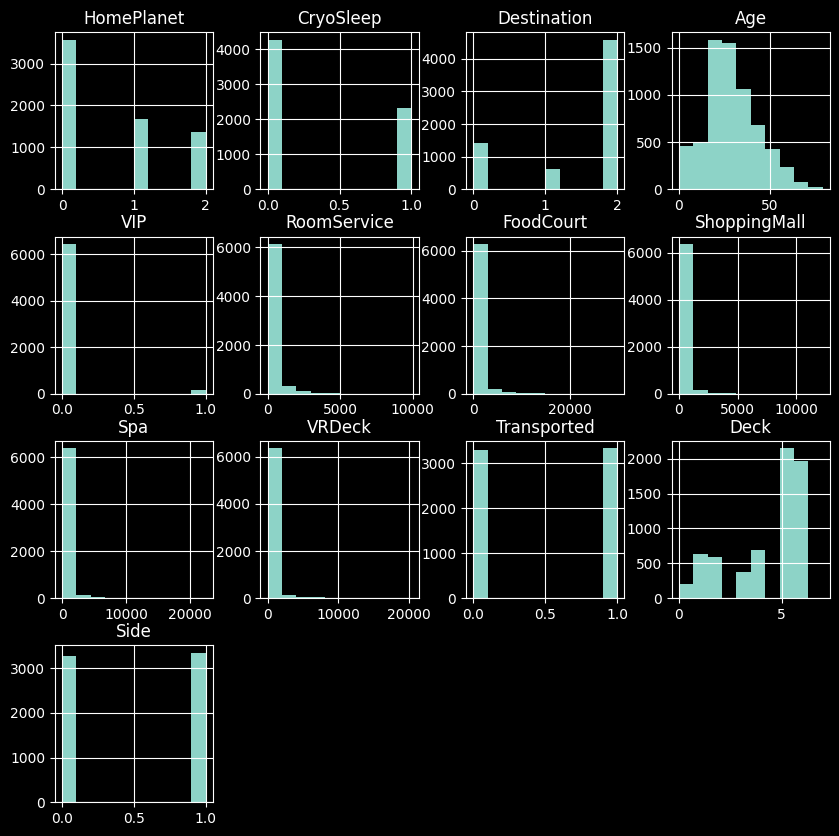

In [94]:

display(data);
data.hist(figsize=(10, 10));

<Axes: >

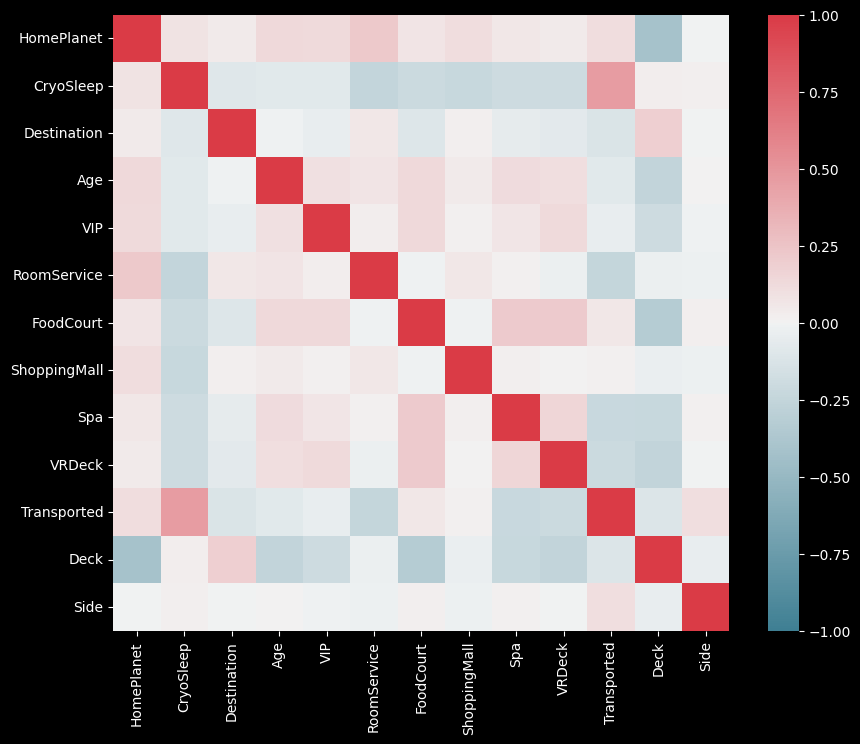

In [95]:
import seaborn as sns


f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), vmin=-1.0, vmax=1.0, square=True, ax=ax)

*   **Obs 1**: Rezultatul "Transported" este corelat direct destul de puternic cu "CryoSleep"
*   **Obs 2**: Rezultatul "Transported" este corelat indirect destul de puternic cu "RoomService"


### Plot cu PCA

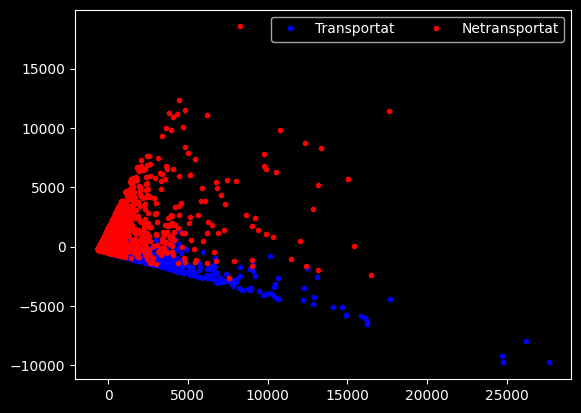

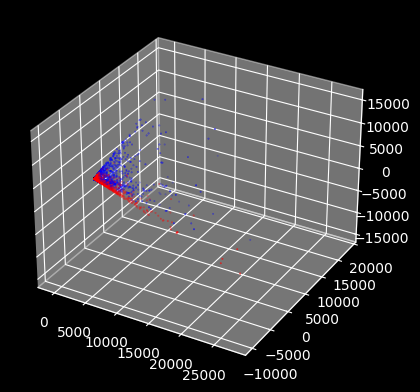

In [96]:
from sklearn.decomposition import PCA

pca2d = PCA(n_components = 2);
pca3d = PCA(n_components = 3);

fig, ax = plt.subplots()

points2d = pca2d.fit_transform(data.drop(columns=["Transported"]));
points3d = pca3d.fit_transform(data.drop(columns=["Transported"]));

list_index = data.index;

points2d_false = [];
points2d_true = [];

iterator = 0;
for p in points2d:
    if(data.loc[list_index[iterator], "Transported"] == True):
        points2d_true.append(p);
    if(data.loc[list_index[iterator], "Transported"] == False):
        points2d_false.append(p);
    iterator += 1;

pointsx_true = [];
pointsy_true = [];

pointsx_false = [];
pointsy_false = [];

for l in points2d_true:
    x = l[0];
    y = l[1];

    pointsx_true.append(x);
    pointsy_true.append(y);

for l in points2d_false:
    x = l[0];
    y = l[1];

    pointsx_false.append(x);
    pointsy_false.append(y);



ax.plot(pointsx_true, pointsy_true, 'b.', label="Transportat");
#set_points2d_2 = 
ax.plot(pointsx_false, pointsy_false, 'r.', label="Netransportat");


# ax.set_xlabel("true");
# ax.set_ylabel("false");

plt.legend(ncol=2);

plt.show();


f = plt.figure();
ax = f.add_subplot(projection='3d')

pointsx_false = [];
pointsy_false = [];
pointsz_false = [];

pointsx_true = [];
pointsy_true = [];
pointsz_true = [];


list_index = data.index;

iterator = 0;
for x, y, z in points3d:
    if(data.loc[list_index[iterator], "Transported"] == True):
        pointsx_true.append(x);
        pointsy_true.append(y);
        pointsz_true.append(z);
    if(data.loc[list_index[iterator], "Transported"] == False):
        pointsx_false.append(x);
        pointsy_false.append(y);
        pointsz_false.append(z);
    iterator += 1;

ax.scatter(pointsx_true, pointsy_true, pointsz_true, s=0.1, c='red')
ax.scatter(pointsx_false, pointsy_false, pointsz_false, s=0.1, c='blue')



*   **Obs**: Se obserba o separare a punctelor $=>$ putem folosi un Classifier

### Normalizarea datelor

In [97]:

data = (data - data.min()) / (data.max() - data.min())


### Train-Test Split

In [98]:
from sklearn.model_selection import train_test_split
display(data);
train, test = train_test_split(data, test_size=0.001);

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,0.5,0.0,1.0,0.493671,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.142857,0.0
1,0.0,0.0,1.0,0.303797,0.0,0.010988,0.000302,0.002040,0.024500,0.002164,1.0,0.714286,1.0
2,0.5,0.0,1.0,0.734177,1.0,0.004335,0.119948,0.000000,0.299670,0.002410,0.0,0.000000,1.0
3,0.5,0.0,1.0,0.417722,0.0,0.000000,0.043035,0.030278,0.148563,0.009491,0.0,0.000000,1.0
4,0.0,0.0,1.0,0.202532,0.0,0.030544,0.002348,0.012324,0.025214,0.000098,1.0,0.714286,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.5,0.0,0.0,0.518987,1.0,0.000000,0.228726,0.000000,0.073322,0.003639,0.0,0.000000,0.0
8689,0.0,1.0,0.5,0.227848,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.857143,1.0
8690,0.0,0.0,1.0,0.329114,0.0,0.000000,0.000000,0.152779,0.000045,0.000000,1.0,0.857143,1.0
8691,0.5,0.0,0.0,0.405063,0.0,0.000000,0.035186,0.000000,0.015753,0.159077,0.0,0.571429,1.0


## Alegerea si Antrenarea Modelului

Pentru Model pot folosi pentru inceput un MLPClassifier.

In [99]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(max_iter=100000, tol=1e-8, verbose=True, activation='relu', learning_rate="adaptive", learning_rate_init=0.00001);
model.fit(train.drop(columns="Transported"), train["Transported"]);

Iteration 1, loss = 0.70928706
Iteration 2, loss = 0.70824132
Iteration 3, loss = 0.70723622
Iteration 4, loss = 0.70624292
Iteration 5, loss = 0.70526688
Iteration 6, loss = 0.70431529
Iteration 7, loss = 0.70337286
Iteration 8, loss = 0.70246084
Iteration 9, loss = 0.70153592
Iteration 10, loss = 0.70064393
Iteration 11, loss = 0.69975139
Iteration 12, loss = 0.69887665
Iteration 13, loss = 0.69800308
Iteration 14, loss = 0.69714975
Iteration 15, loss = 0.69630341
Iteration 16, loss = 0.69546419
Iteration 17, loss = 0.69463368
Iteration 18, loss = 0.69380746
Iteration 19, loss = 0.69299303
Iteration 20, loss = 0.69218634
Iteration 21, loss = 0.69137668
Iteration 22, loss = 0.69057971
Iteration 23, loss = 0.68979620
Iteration 24, loss = 0.68899460
Iteration 25, loss = 0.68821663
Iteration 26, loss = 0.68743160
Iteration 27, loss = 0.68665968
Iteration 28, loss = 0.68588466
Iteration 29, loss = 0.68511712
Iteration 30, loss = 0.68436159
Iteration 31, loss = 0.68359506
Iteration 32, los

### Scorarea Modelului

In [100]:
print(model.score(test.drop(columns=["Transported"]), test['Transported']))

0.8571428571428571


In [101]:
data = pd.read_csv("test.csv");

pas_id = data["PassengerId"];

data["CryoSleep"].fillna(1, inplace=True);
data["HomePlanet"].fillna("Earth", inplace=True);
data["Cabin"].fillna("C/0/S", inplace=True);
data["Destination"].fillna("TRAPPIST-1e", inplace=True);
data["Age"].fillna(60.0, inplace=True);
data["VIP"].fillna(0.0, inplace=True);
data["RoomService"].fillna(40.0, inplace=True);
data["FoodCourt"].fillna(40.0, inplace=True);
data["ShoppingMall"].fillna(40.0, inplace=True);
data["Spa"].fillna(40.0, inplace=True);
data["VRDeck"].fillna(0.0, inplace=True);

def process_cabin(row):
    try:
        row["Deck"] = row['Cabin'].split('/')[0];
        row["Number"] = row['Cabin'].split('/')[1];
        row["Side"] = row['Cabin'].split('/')[2];
    except Exception:
        row["Deck"] = "G";
        row["Number"] = 0;
        row["Side"] = "P";
        return row;
    return row;

data = data.apply(process_cabin, axis=1);

display(data);

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder();

data.drop(columns=["Name", "Cabin", "PassengerId", "Number"], inplace=True);

# Coloanele care contin stringuri (True/False sau un numar) le transformam in numbere folosing un encoder

data["HomePlanet"] = enc.fit_transform(data["HomePlanet"]);
data["CryoSleep"] = enc.fit_transform(data["CryoSleep"]);
data["VIP"] = enc.fit_transform(data["VIP"]);
data["Deck"] = enc.fit_transform(data["Deck"]);
data["Side"] = enc.fit_transform(data["Side"]);
data["Destination"] = enc.fit_transform(data["Destination"]);
data = (data - data.min()) / (data.max() - data.min())

display(data);

/var/folders/tx/76w278b161bdwbkc9k2ktmp00000gp/T/ipykernel_3763/2682118390.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["CryoSleep"].fillna(1, inplace=True);
/var/folders/tx/76w278b161bdwbkc9k2ktmp00000gp/T/ipykernel_3763/2682118390.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Number,Side
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,G,1496,S
4273,9269_01,Earth,False,C/0/S,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,C,0,S
4274,9271_01,Mars,True,D/296/P,55 Cancri e,60.0,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,D,296,P
4275,9273_01,Europa,False,D/297/P,TRAPPIST-1e,60.0,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,D,297,P


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
0,0.0,1.0,1.0,0.341772,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.857143,1.0
1,0.0,0.0,1.0,0.240506,0.0,0.000000,0.000356,0.00000,0.142260,0.000000,0.714286,1.0
2,0.5,1.0,0.0,0.392405,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.285714,1.0
3,0.5,0.0,1.0,0.481013,0.0,0.000000,0.263206,0.00000,0.009121,0.026266,0.285714,1.0
4,0.0,0.0,1.0,0.253165,0.0,0.000865,0.000000,0.07658,0.000000,0.000000,0.714286,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0.0,1.0,1.0,0.430380,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.857143,1.0
4273,0.0,0.0,1.0,0.531646,0.0,0.000000,0.033514,0.00205,0.000504,0.006466,0.285714,1.0
4274,1.0,1.0,0.0,0.759494,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.428571,0.0
4275,0.5,0.0,1.0,0.759494,0.0,0.000000,0.106042,0.00000,0.000000,0.023482,0.428571,0.0


In [102]:
data = data[["HomePlanet", "CryoSleep",	"Destination", "Age", "VIP", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck",  "Deck", "Side"]]

res = model.predict(data);

ans = pd.DataFrame(res);
ans["PassengerId"] = pas_id;
ans["Transported"] = ans[0];
ans.drop(columns=[0], inplace=True);
ans.to_csv("ans.csv", index=False);